In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import time

# Raices

En muchos problemas de la vida real, ya sea en la ingeniería, la física, la economía o las ciencias sociales, se nos presenta la necesidad de resolver ecuaciones para las cuales no siempre es posible obtener una solución exacta mediante métodos analíticos tradicionales. Por ejemplo, ecuaciones no lineales complejas o sistemas de ecuaciones que involucran múltiples variables pueden ser intratables por métodos algebraicos convencionales.




## Ejemplo

Consideremos la función cuadrática:

$$
f(x) = x^2 - 4
$$

### Paso 1: Graficar la función
Si graficamos la función $f(x) = x^2 - 4$, obtenemos una parábola que se abre hacia arriba, con su vértice en $(0, -4)$.

### Paso 2: Identificar visualmente las raíces
Las raíces de la función se encuentran en los puntos donde la gráfica corta el eje $x$. Para esta función, podemos ver que la gráfica cruza el eje $x$ en dos puntos:

$$
x = -2 \quad \text{y} \quad x = 2
$$

### Paso 3: Confirmar las raíces
Podemos confirmar que estos puntos son efectivamente las raíces resolviendo la ecuación $x^2 - 4 = 0$

$$
x^2 = 4 \quad \Rightarrow \quad x = \pm 2
$$

Así, las raíces de la función son $x = -2$ y $x = 2$, lo que coincide con los puntos donde la gráfica corta el eje $x$.


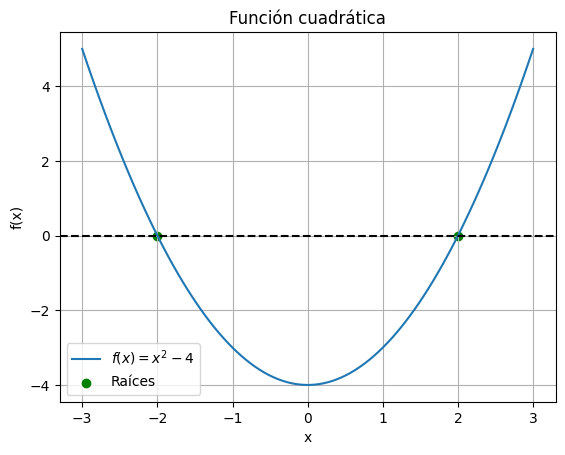

In [2]:
x = np.linspace(-3, 3, 100)
y = x**2 - 4

plt.plot(x, y, label='$f(x) = x^2 - 4$')
plt.axhline(0, color='black', linestyle='--')
plt.scatter([-2, 2], [0, 0], color='green', label='Raíces')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función cuadrática')
plt.grid(True)
plt.show()

## Ejemplo
Encontremos las raices para la ecuación

$$3\sin(x) + 9 = x^2 - \cos(x)$$

Los puntos donde las funciones se encuentran serán las denominadas raíces. Tomemos:

$$f_1(x) = 3\sin(x) + 9 $$

$$f_2(x) = x^2 - \cos(x)$$


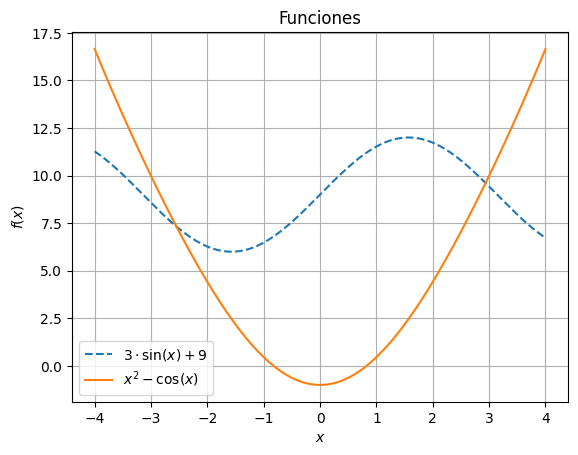

In [3]:
x = np.linspace(-4, 4, 100000)
f1 = lambda x: 3*np.sin(x) + 9
f2 = lambda x: x**2 - np.cos(x)

plt.plot(x, f1(x), '--', label='$3\cdot\sin(x) + 9$')
plt.plot(x, f2(x), label='$x^2 - \cos(x)$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Funciones')
plt.grid(True)
plt.show()

Analicemos la diferencia entre las funciones para tratar de encontrar cuando son cercanos a cero $f_1(x) - f_2(x) \approx 0$ esto es:

$$\left(3\sin(x) + 9\right) - \left(x^2 - \cos(x)\right) = 0$$

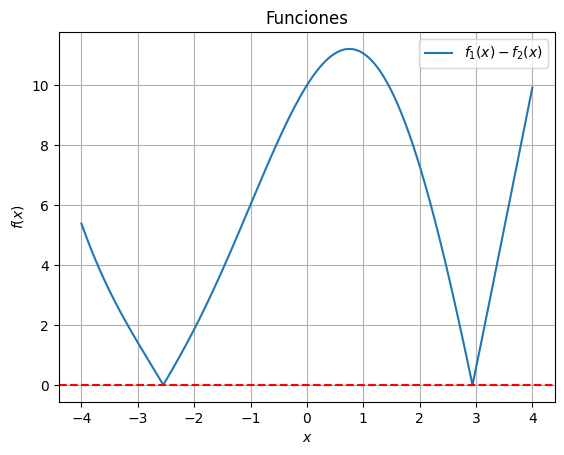

In [4]:
dif = f1(x) - f2(x)
plt.plot(x, abs(dif), label='$f_1(x) - f_2(x)$')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Funciones')
plt.grid(True)

In [5]:
# Restar las funciones
diferencia = np.abs(f1(x) - f2(x))

tol = 0.0002
indices = np.where(diferencia < tol)

# Obtener los valores de x correspondientes
x_vals = x[indices]

# Mostrar los resultados
print("Los valores de x donde f1(x) y f2(x) son cercanas son:", x_vals)

# Evaluacion
res = abs(f1(x_vals) - f2(x_vals))
print(f'La evaluación de la raiz será igual a {res}')

Los valores de x donde f1(x) y f2(x) son cercanas son: [-2.54822548  2.93750938]
La evaluación de la raiz será igual a [1.69324757e-05 1.99871552e-04]


In [6]:
minimo = np.argmin(abs(f1(x) - f2(x)))
print(f'La raiz será {x[minimo]}')

La raiz será -2.5482254822548223


Veamos la solución usando `sympy`

In [7]:
# Definir la variable simbólica
x = sp.symbols('x')

# Definir las funciones f1 y f2
f1 = 3 * sp.sin(x) + 9
f2 = x**2 - sp.cos(x)

# Restar las funciones
diferencia = f1 - f2

# Encontrar raíces numéricas
# Es recomendable elegir valores iniciales basados en el comportamiento de las funciones
raiz1 = sp.nsolve(diferencia, x, -3)  # Valor inicial -3
raiz2 = sp.nsolve(diferencia, x, 2)   # Valor inicial 2

# Mostrar las raíces encontradas
print("Raíz numérica alrededor de -3:", raiz1)
print("Raíz numérica alrededor de 2:", raiz2)



Raíz numérica alrededor de -3: -2.54823082639754
Raíz numérica alrededor de 2: 2.93748720510786


# Teorema del Valor Medio

Sea $f$ una función que satisface las siguientes condiciones:

1. $f$ es continua en el intervalo cerrado $[a,b]$
2. $f$ es derivable en el intervalo abierto $(a,b)$

Entonces existe al menos un punto $c$ en el intervalo $(a,b)$ tal que:

$$ f'(c) = \frac{f(b) - f(a)}{b - a} $$


El teorema del valor medio establece que existe al menos un punto en la curva de $f$ donde la tangente es paralela a la línea secante que une los puntos $(a,f(a))$ y $(b,f(b))$.





# Método de la Bisección


El **Método de la Bisección** es un método numérico utilizado para encontrar raíces de funciones continuas. Se basa en el Teorema del Valor Intermedio, que establece que si una función es continua en un intervalo cerrado $[a, b]$ y cambia de signo, entonces existe al menos una raíz en ese intervalo.

![Biseccion](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Bisection_method.svg/800px-Bisection_method.svg.png)

### Pasos del Método de la Bisección

1. **Definir la función** $f(x)$ que queremos analizar y el intervalo $[a, b]$ tal que:
   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).

2. **Calcular el punto medio**:
   $$
   c = \frac{a + b}{2}
   $$

3. **Evaluar la función en el punto medio**:
   - Si $f(c) = 0$, entonces $c$ es la raíz.
   - Si $f(c) \cdot f(a) < 0$, entonces la raíz se encuentra en el intervalo $[a, c]$. Actualizar $b = c$.
   - Si $f(c) \cdot f(b) < 0$, entonces la raíz se encuentra en el intervalo $[c, b]$. Actualizar $a = c$.

4. **Repetir** los pasos 2 y 3 hasta que la precisión deseada sea alcanzada:
   $$
   f(c) < \epsilon
   $$
   donde $\epsilon$ es un valor pequeño que determina la precisión.

### Ejemplo

Consideremos la función $f(x) = x^2 - 4$ y busquemos la raíz en el intervalo $[0, 3]$:

1. $f(0) = -4$ y $f(3) = 5$ (cambio de signo).
2. Calcular $c$:
   $$
   c = \frac{0 + 3}{2} = 1.5
   $$
   $f(1.5) = 1.25$ (signo positivo).
3. Actualizar intervalo: $[0, 1.5]$.
4. Repetir hasta que $f(c)$ sea menor que $\epsilon$.



In [8]:
def biseccion_g(f, a, b, tol=1e-8, max_iter=100):
  i = 0
  while i < max_iter:
    c = (a + b)/2
    if f(a)*f(b) > 0:
      raise ValueError('No hay raiz en el intervalo')
    if abs(f(c)) < tol:
      return c
    elif f(c)*f(a) < 0:
      b = c
    else:
      a = c
    i += 1
  raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')

In [9]:
# Usando recursividad de funciones
def biseccion_r(f, a, b, tol=1e-8, max_iter=100):
  '''
  Funcion que implementa el metodo de biseccion para encontrar la raiz de una funcion continua
  f: funcion
  a: limite inferior
  b: limite superior
  tol: tolerancia (1e-6)
  max_iter: numero maximo de iteraciones (100)
  '''
  c = (a + b)/2
  iteraciones = 0
  while iteraciones < max_iter:
    if f(a)*f(b) >= 0:
      raise ValueError('No hay raiz en el intervalo')
    if abs(f(c)) < tol:
      return c
    elif f(c)*f(a) < 0:
      iteraciones += 1
      return biseccion_r(f, a, c, tol, max_iter)
    else:
      iteraciones += 1
      return biseccion_r(f, c, b, tol, max_iter)


In [10]:
def biseccion(f, a, b, tol=1e-8, max_iter=100):
    '''
    Función que implementa el método de bisección para encontrar la raíz de una función continua
    f: función
    a: límite inferior
    b: límite superior
    tol: tolerancia (1e-8)
    max_iter: número máximo de iteraciones (100)

    Retorna:
    x : aproximación de la raíz
    iteraciones : número de iteraciones realizadas
    errores : array con los errores en cada iteración
    """
    '''

    # Verificación inicial de cambio de signo
    if f(a) * f(b) >= 0:
        raise ValueError('No hay raíz en el intervalo dado o hay múltiples raíces')

    # Inicialización de variables
    iteraciones = np.arange(max_iter)
    errores = np.zeros(max_iter)  # Lista para almacenar errores absolutos
    i = 0  # Contador de iteraciones
    c_anterior = a  # Variable para almacenar el valor anterior de c

    while i < max_iter:
        # Calcular el punto medio
        c = (a + b) / 2

        # Calcular el error absoluto
        error_abs = abs(c - c_anterior)
        errores[i] = error_abs # Almacena los errores absolutos

        # Verificar si el valor de f(c) es suficientemente pequeño o el error es menor que la tolerancia
        if abs(f(c)) < tol:
            return c, iteraciones[:i], errores[:i]

        # Determinar el nuevo intervalo
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c

        # Actualizar el valor de c_anterior para el siguiente cálculo de error
        c_anterior = c

        # Incrementar el contador de iteraciones
        i += 1

    # Si no converge en el número máximo de iteraciones
    raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')



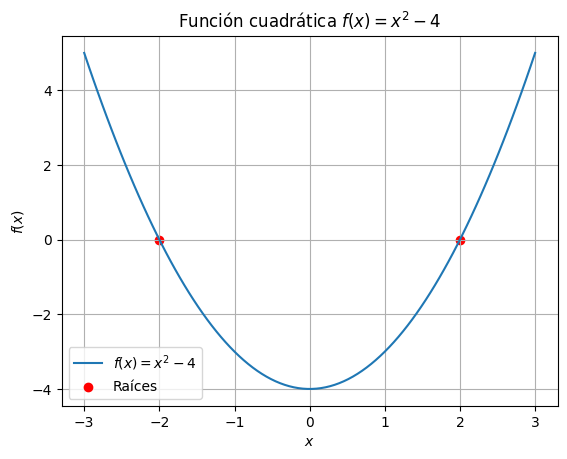

In [11]:
f = lambda x: x**2 - 4
x = np.linspace(-3, 3, 100)
x_1, iter_1, err_1 = biseccion(f, 0, 3)
x_2, iter_2, err_2 = biseccion(f, 0, -3)
plt.plot(x, f(x), label='$f(x) = x^2 - 4$')
plt.scatter([x_1, x_2], [f(x_1), f(x_2)], color='red', label='Raíces')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Función cuadrática $f(x) = x^2 - 4$')
plt.grid(True)
plt.show()

Las raices son -2.548230826854706 y 2.93748720549047


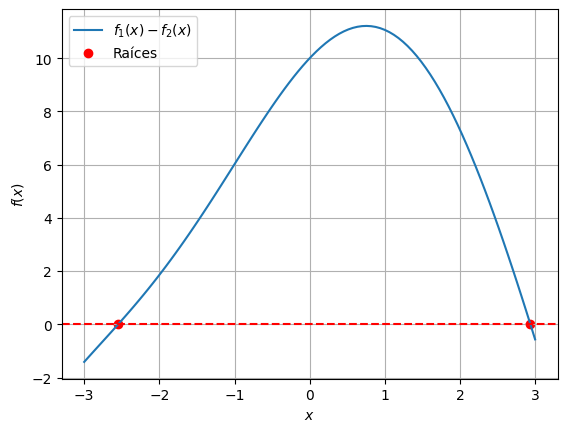

In [12]:
fd = lambda x: 3*np.sin(x) + 9 - (x**2 - np.cos(x))

x_1 = biseccion_r(fd, -3,-2)
x_2 = biseccion_r(fd, 2, 4)
plt.plot(x, fd(x), label='$f_1(x) - f_2(x)$')
plt.axhline(0, color='red', linestyle='--')
plt.scatter([x_1, x_2], [fd(x_1), fd(x_2)], color='red', label='Raíces')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
print(f'Las raices son {x_1} y {x_2}')

### Convergencia del Método de Bisección

- **Convergencia Lineal**: El método de bisección tiene una tasa de convergencia **lineal**, lo que significa que en cada iteración reduce el tamaño del intervalo que contiene la raíz a la mitad.

  Si $ I_n $ es la longitud del intervalo después de $ n $ iteraciones, entonces:
  $$
  I_{n+1} = \frac{I_n}{2}
  $$

  Esto implica que después de $ n $ iteraciones, la longitud del intervalo se puede expresar como:
  $$
  I_n = \frac{b - a}{2^n}
  $$

* **Estimación de Iteraciones**

El número de iteraciones $ n $ necesarias para que la longitud del intervalo sea menor que una tolerancia dada $\text{tol} $ se puede aproximar mediante la siguiente fórmula:
$$
n \geq \log_2\left(\frac{b - a}{\text{tol}}\right)
$$

Esto significa que aunque la convergencia del método es lineal, el uso del logaritmo permite estimar cuántas iteraciones se necesitan para alcanzar una tolerancia específica.




### Actividad
Examina la convergencia del método de bisección en funcón de los términos necesarios y el error absoluto para obtener $|f(c)|< ϵ$

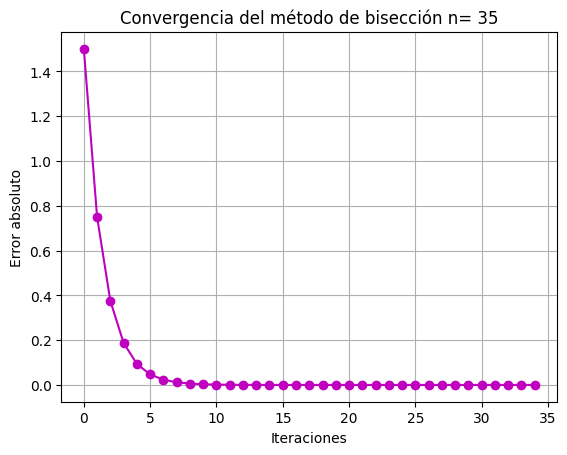

La raiz será 2.000000000014552
El numero de iteraciones necesarias para converger es 35.0


In [13]:
a , b = 0, 3
tol=1e-10
f = lambda x: x**2 - 4
raiz, iter, error = biseccion(f, a, b, tol)
plt.plot(iter, error, 'mo-')
plt.xlabel('Iteraciones')
plt.ylabel('Error absoluto')
plt.title(f'Convergencia del método de bisección n= {len(iter)}')
plt.grid(True)
plt.show()


n_conv = np.log2((b-a)/tol)
print(f'La raiz será {raiz}')
print(f'El numero de iteraciones necesarias para converger es {np.round(n_conv)}')


# Método Regula Falsi

También conocido como método de la *falsa posición*, es un algoritmo numérico utilizado para encontrar las raíces de una función continua. Es una mejora del método de bisección y combina elementos de este con el método de la secante.

![](https://upload.wikimedia.org/wikipedia/commons/9/97/False_position_method.svg)

## Funcionamiento del método

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

## Ventajas y desventajas

### Ventajas:
- Generalmente converge más rápido que el método de bisección.
- Es más robusto que el método de la secante, ya que siempre mantiene la raíz acotada en un intervalo.
- No requiere el cálculo de derivadas.

### Desventajas:
- Puede converger más lentamente que otros métodos (como Newton-Raphson) en algunos casos.
- Si la función es casi lineal cerca de una raíz, pero muy no lineal cerca de la otra frontera del intervalo, el método puede converger lentamente.



In [14]:
def regula_falsi(f, a, b, tol=1e-8, max_iter=100):
    """
    Implementación del método de Regula Falsi (falsa posición)

    Parámetros:
    f : función de la cual se busca la raíz
    a, b : límites del intervalo inicial
    tol : tolerancia para el valor de f(x)
    max_iter : número máximo de iteraciones

    Retorna:
    x : aproximación de la raíz
    iteraciones : número de iteraciones realizadas
    errores : array con los errores en cada iteración
    """

    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos")

    iteraciones = np.arange(max_iter)
    errores = np.zeros(max_iter)

    fa, fb = f(a), f(b)

    for i in iteraciones:
        # Calcular el punto de intersección
        c = (a * fb - b * fa) / (fb - fa)
        fc = f(c)

        # Calcular el error
        errores[i] = abs(fc)

        # Verificar si se ha encontrado la raíz
        if abs(fc) < tol:
            return c, iteraciones[:i+1], errores[:i+1]

        # Actualizar el intervalo
        if fc * fa < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc

    # Si no converge, devolver el último valor calculado
    return c, iteraciones, errores

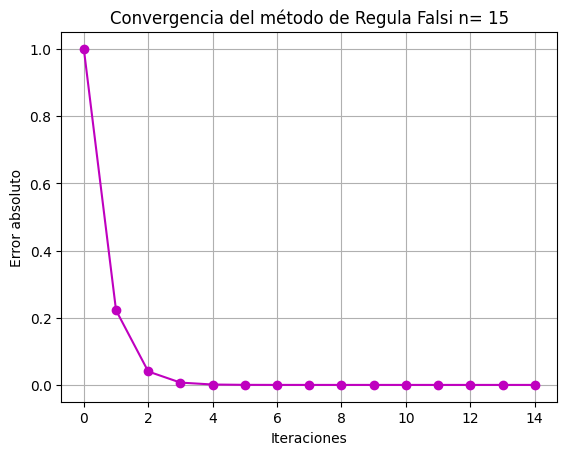

La raiz será 1.4142135623637997


In [15]:
a , b = 0, 2
tol=1e-10
f = lambda x: x**2 - 2
raiz, iter, error = regula_falsi(f, a, b, tol)
plt.plot(iter, error, 'mo-')
plt.xlabel('Iteraciones')
plt.ylabel('Error absoluto')
plt.title(f'Convergencia del método de Regula Falsi n= {len(iter)}')
plt.grid(True)
plt.show()

print(f'La raiz será {raiz}')


# Método de Punto Fijo para Hallar Raíces

El método de punto fijo es una técnica iterativa utilizada para encontrar raíces de ecuaciones de la forma $f(x) = 0$. Este método se basa en reformular la ecuación original en una forma que permita definir un nuevo valor de $x$ en función de otro.

![Punto fijo](https://www.researchgate.net/publication/355182751/figure/fig1/AS:1078440195301381@1634131587922/Schematic-representation-of-fixed-point-iterations-m-k-1-gm-k-It-starts-with.png)

## Pasos del Método de Punto Fijo

1. **Reformulación**: Comienza con la ecuación $f(x) = 0$ y reescríbela en la forma $x = g(x)$, donde $g(x)$ es una función que debe ser continua y que tiene una raíz en el intervalo donde buscas.

2. **Elección de un punto inicial**: Selecciona un valor inicial $x_0$ que esté en el intervalo donde se espera que esté la raíz.

3. **Iteración**: Aplica la función $g$ de forma iterativa para calcular nuevos valores:
   $$
   x_{n+1} = g(x_n)
   $$
   Repite este paso hasta que el cambio entre iteraciones sea menor que una tolerancia predefinida, es decir, hasta que $|x_{n+1} - x_n| < \epsilon$, donde $\epsilon$ es la tolerancia deseada.

4. **Convergencia**: El método convergerá a una raíz $r$ si $g$ es una función contractiva en un intervalo que contiene $r$. Esto significa que si $|g(x_1) - g(x_2)| \leq k |x_1 - x_2|$ para algún $k < 1$ y todos $x_1, x_2$ en el intervalo.

## Ejemplo

Supongamos que queremos encontrar la raíz de la ecuación:

$$
x^3 - x - 2 = 0
$$

### Paso 1: Reformulación

Reformulamos la ecuación en la forma $x = g(x)$:

$$
x = \sqrt[3]{x + 2}
$$

Aquí, $g(x) = \sqrt[3]{x + 2}$.

### Paso 2: Elección de un punto inicial

Elegimos un valor inicial $x_0 = 1$.

### Paso 3: Iteración

Usamos la función $g(x)$ para calcular los valores sucesivos:

1. **Primera iteración**:
   $$
   x_1 = g(x_0) = g(1) = \sqrt[3]{1 + 2} = \sqrt[3]{3} \approx 1.442
   $$

2. **Segunda iteración**:
   $$
   x_2 = g(x_1) = g(1.442) = \sqrt[3]{1.442 + 2} \approx \sqrt[3]{3.442} \approx 1.503
   $$

3. **Tercera iteración**:
   $$
   x_3 = g(x_2) = g(1.503) = \sqrt[3]{1.503 + 2} \approx \sqrt[3]{3.503} \approx 1.516
   $$

4. **Cuarta iteración**:
   $$
   x_4 = g(x_3) = g(1.516) = \sqrt[3]{1.516 + 2} \approx \sqrt[3]{3.516} \approx 1.519
   $$

### Paso 4: Convergencia

Continuamos este proceso hasta que la diferencia entre dos iteraciones consecutivas sea menor que una tolerancia deseada, por ejemplo, $0.001$.

Después de algunas iteraciones más, notamos que $|x_{n+1} - x_n| < 0.001$, lo que indica que hemos encontrado una solución aproximada a la raíz.




In [16]:
def punto_fijo(g, x0, tol=1e-12, max_iter=100):
    """
    Método de Punto Fijo para hallar raíces.

    Parámetros:
    g : función
        La función g(x) tal que x = g(x).
    x0 : float
        Valor inicial para comenzar la iteración.
    tolerancia : float
        La tolerancia para determinar la convergencia.
    max_iter : int
        El número máximo de iteraciones permitidas.

    Retorna:
    x_n : float
        Aproximación de la raíz.
    iteraciones : int
        Número de iteraciones realizadas.
    """
    x_n = x0
    for n in range(max_iter):
        x_n1 = g(x_n)
        if abs(x_n1 - x_n) < tol:
            return x_n1, n + 1  # Retorna la raíz aproximada y el número de iteraciones
        x_n = x_n1

    raise ValueError("El método no convergió después de {} iteraciones".format(max_iter))

In [17]:
f = lambda x: x**3 - x - 2
g = lambda x: np.power(x + 2, 1/3)
x = np.linspace(-2, 2, 100)
raiz, iter = punto_fijo(g, 0)
print(f'La raiz será {raiz}')
print(f'Se realizaron {iter} iteraciones')

La raiz será 1.5213797068045034
Se realizaron 16 iteraciones


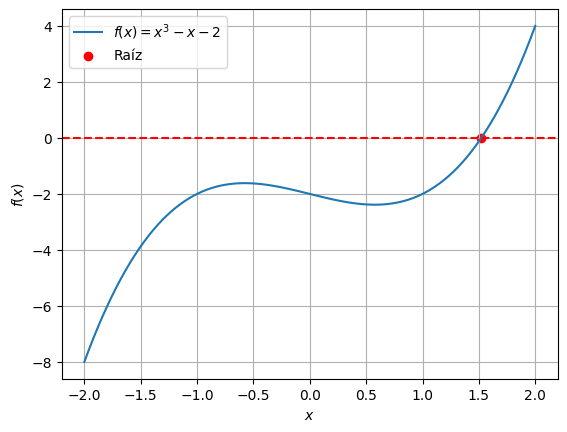

In [18]:
plt.plot(x, f(x), label='$f(x)= x^3 - x - 2$')
plt.axhline(0, color='red', linestyle='--')
plt.scatter([raiz], [f(raiz)], color='red', label='Raíz')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.show()

### Ejemplo
Hallemos las raices para:

$$\left(3\sin(x) + 9\right) - \left(x^2 - \cos(x)\right) = 0$$

In [19]:
f = lambda x: 3*np.sin(x) + 9 - (x**2 - np.cos(x))
g = lambda x: np.sqrt(3*np.sin(x) + 9 + np.cos(x))
x = np.linspace(-3, 3, 100)
raiz, iter = punto_fijo(g, -3, max_iter = 1000)

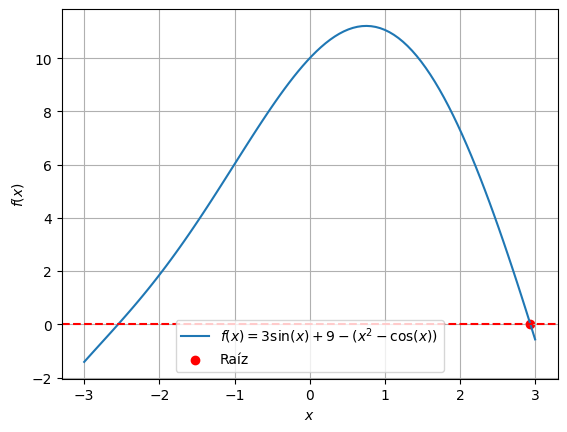

In [20]:
plt.plot(x, f(x), label='$f(x)= 3\sin(x) + 9 - (x^2 - \cos(x))$')
plt.axhline(0, color='red', linestyle='--')
plt.scatter([raiz], [f(raiz)], color='red', label='Raíz')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.legend()
plt.show()

Observamos que es importante escoger muy bien el $g(x)$ y $x_0$ para poder acceder a todas las raices.


Usando `fsolve` de `scipy.optimize`

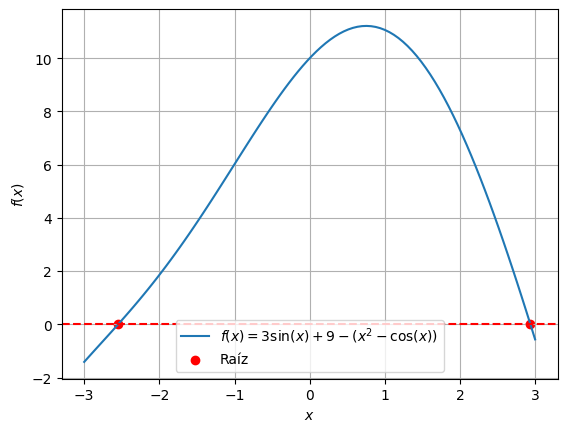

In [21]:
from scipy.optimize import fsolve

f = lambda x: 3*np.sin(x) + 9 - (x**2 - np.cos(x))
x = np.linspace(-3, 3, 100)
raices = fsolve(f, [-3,3])
plt.plot(x, f(x), label='$f(x)= 3\sin(x) + 9 - (x^2 - \cos(x))$')
plt.axhline(0, color='red', linestyle='--')
plt.scatter(raices, f(raices), color='red', label='Raíz')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.legend()
plt.show()


### Ejemplo
encontrar punto fijos (y las raíces) de la función,

$$f(x)=\cos(x) + \log(x)-x + 10.$$

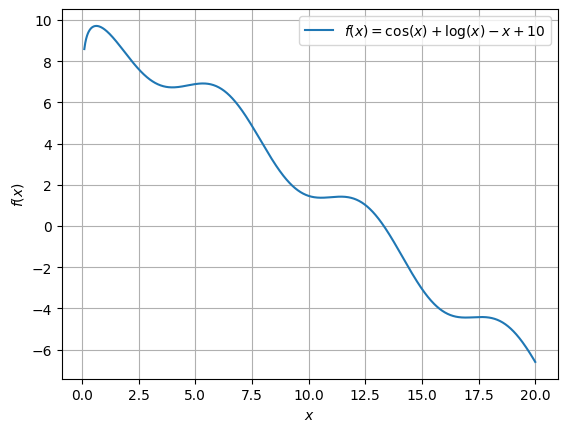

In [22]:
f = lambda x: np.cos(x) + np.log(x) - x + 10
g = lambda x: np.cos(x) + np.log(x) + 10
x = np.linspace(0.1, 20, 1000)
plt.plot(x, f(x), label='$f(x)= \cos(x) + \log(x) - x + 10$')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

La raiz será 13.319053240726348
Se realizaron 54 iteraciones


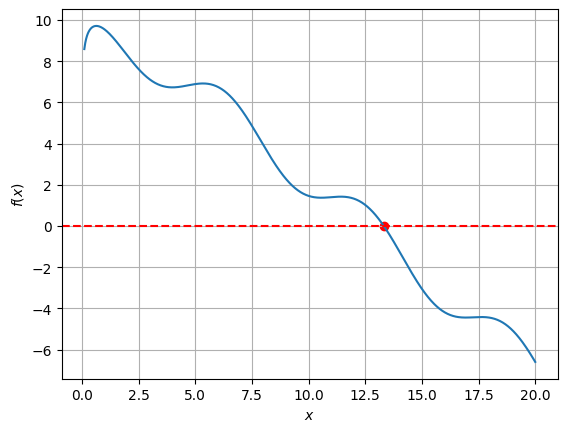

In [23]:
raiz, iter = punto_fijo(g, 5, max_iter = 1000)
print(f'La raiz será {raiz}')
print(f'Se realizaron {iter} iteraciones')
plt.plot(x, f(x), label='$f(x)= \cos(x) + \log(x) - x + 10$')
plt.axhline(0, color='red', linestyle='--')
plt.scatter([raiz], [f(raiz)], color='red', label='Raíz')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.show()
